# Plot weight against LOR

In [1]:
from seffnet.default_predictor import predictor
from seffnet.constants import DEFAULT_WEIGHTED_FULLGRAPH_PICKLE
import pybel
import networkx as nx
from tqdm import tqdm_notebook as tqdm

In [2]:
graph = pybel.from_pickle(DEFAULT_WEIGHTED_FULLGRAPH_PICKLE)

In [3]:
info = {}
for edge in tqdm(graph.edges()):
    if edge[0].namespace == 'pubchem.compound':
        if edge[1].namespace != 'uniprot':
            continue 
        r = predictor.find_new_relation(
        source_curie=edge[0].namespace+':'+edge[0].identifier,
        target_curie=edge[1].namespace+':'+edge[1].identifier,
        )
        for iden, edge_d in graph[edge[0]][edge[1]].items():
            weight = edge_d['weight']
        lor = r['lor']
        info[edge] = (weight, lor)

In [4]:
len(info.keys())

21356

In [5]:
weights = [w for w, lor in info.values()]
lors = [lor for w, lor in info.values()]

In [6]:
len(lors)

21356

In [7]:
import matplotlib.pyplot as plt

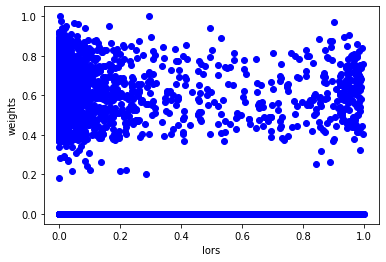

In [8]:
plt.plot(lors, weights, 'bo')
plt.ylabel('weights')
plt.xlabel('lors')
plt.show()

#### Scattered results could be because of the p and q parameters in node2vec
#### Also, here we are only considering chemicals but there are other entities that have weighted relations and could affect the path of the random walk, thus affecting the probabilities